In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1D Ising model + Transfer matrix

* Construct the transfer matrix at temperature $T$ with external field $B$
* Find the eivenvalues of the transfer matrix and compare to the exact results.
* Evaluate the partition function $Z$ at different system size $N$ and $T$, $B$. Compare to the exact results.
* For a fixed $N$, $T$, $B$, evaluate $\langle S_0 S_j\rangle$ where $j=0,1,\cdots N$. 
* Plot $\langle S_0 S_j\rangle$ up to $j=N/2$ and show that it decays exponentially.
  * Please try several $N$, $T$, $B$. What is the largest $N$ you can go? What is the lowest $T$ you can go?

In [2]:
def transfermatrix (t,B,N,J):
    kb = 1
    beta = 1/kb/t
    T = np.array([[np.exp(J*beta+B*beta),np.exp(-J*beta)],[np.exp(-J*beta),np.exp(J*beta-B*beta)]])
    return T

def partition_function(t,B,N,J):
    T = transfermatrix (t,B,N,J)
    z = np.array([[1,0],[0,1]])
    for i in range(N):
        z = z.dot(T)
    return z

def exact_eigen(t,B,N,J):
    kb = 1
    beta = 1/kb/t
    lambda1 = np.exp(beta*J)*np.cosh(beta*B) + np.sqrt(np.exp(-2*beta*J) + np.exp(2*beta*J)*np.sinh(beta*B)**2)
    lambda2 = np.exp(beta*J)*np.cosh(beta*B) - np.sqrt(np.exp(-2*beta*J) + np.exp(2*beta*J)*np.sinh(beta*B)**2)
    return np.array([lambda1,lambda2])

Construct the transfer matrix at temperature $T$ with external field $B$

In [21]:
t  =  1
B  =  3
N  = 32
J  =  1
print(transfermatrix (t,B,N,J))

[[54.59815003  0.36787944]
 [ 0.36787944  0.13533528]]


Find the eivenvalues of the transfer matrix and compare to the exact results.

In [3]:
t  =  1
B  =  0
N  = 32
J  =  1

e_vals,e_vecs = np.linalg.eig(transfermatrix (t,B,N,J))
print(e_vals)
print("exact:")

print(exact_eigen(t,B,N,J))

[3.08616127 2.35040239]
exact:
[3.08616127 2.35040239]


Evaluate the partition function $Z$ at different system size $N$ and $T$, $B$. Compare to the exact results.

In [8]:
print("t=1 B=1 N=32 J=1")
print("by trace:",np.trace(partition_function(1,1,32,1)))
print("exact   :",np.sum(exact_eigen(1,1,32,1)**32))
print()

print("t=1 B=10 N=16 J=1")
print("by trace:",np.trace(partition_function(1,10,16,1)))
print("exact   :",np.sum(exact_eigen(1,10,16,1)**16))
print()

print("t=0.1 B=1 N=32 J=1")
print("by trace:",np.trace(partition_function(0.1,1,32,1)))
print("exact   :",np.sum(exact_eigen(0.1,1,32,1)**32))
print()

print("t=1 B=1 N=10 J=1")
print("by trace:",np.trace(partition_function(1,1,10,1)))
print("exact   :",np.sum(exact_eigen(1,1,10,1)**10))

t=1 B=1 N=32 J=1
by trace: 6.831231967849143e+27
exact   : 6.831231967849113e+27

t=1 B=10 N=16 J=1
by trace: 2.7279023204583233e+76
exact   : 2.7279023204583204e+76

t=0.1 B=1 N=32 J=1
by trace: 8.88113390315887e+277
exact   : 8.881133903158874e+277

t=1 B=1 N=10 J=1
by trace: 499207324.1349155
exact   : 499207324.1349148


For a fixed $N$, $T$, $B$, evaluate $\langle S_0 S_j\rangle$ where $j=0,1,\cdots N$.


Plot $\langle S_0 S_j\rangle$ up to $j=N/2$ and show that it decays exponentially

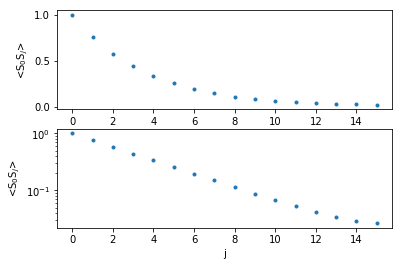

In [19]:
t      = 1
B      = 0
N      = 32
J      =  1
result = np.zeros(N+1)
z0     = np.array([[1,0],[0,-1]])
T      = transfermatrix (t,B,N,J)

for j in range(N):
    z_s0sj = z0
    z = np.array([[1,0],[0,1]])
    for i in range(N):
        z = z.dot(T)
        if i==j:
            z_s0sj = z_s0sj.dot(z0).dot(T)
        else :
            z_s0sj = z_s0sj.dot(T)    
    result[j] = np.trace(z_s0sj)/np.trace(z)
result[N]=result[0]

plt.subplot(2, 1, 1)
plt.plot(result[0:N//2],'.')
plt.xlabel('j')
plt.ylabel('<S$_{0}$S$_{j}$>')

plt.subplot(2, 1, 2)
plt.plot(result[0:N//2],'.')
plt.xlabel('j')
plt.ylabel('<S$_{0}$S$_{j}$>')
plt.yscale('log')

Please try several $N$, $T$, $B$. What is the largest $N$ you can go? What is the lowest $T$ you can go?

Text(0.5, 1.0, 'N = 629')

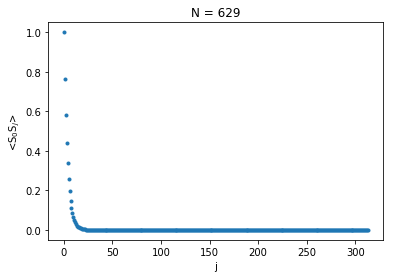

In [13]:
t      = 1
B      = 0
N      = 629
J      = 1
result = np.zeros(N+1)
z0     = np.array([[1,0],[0,-1]])
T      = transfermatrix (t,B,N,J)

for j in range(N):
    z_s0sj = z0
    z = np.array([[1,0],[0,1]])
    for i in range(N):
        z = z.dot(T)
        if i==j:
            z_s0sj = z_s0sj.dot(z0).dot(T)
        else :
            z_s0sj = z_s0sj.dot(T)    
    result[j] = np.trace(z_s0sj)/np.trace(z)
result[N]=result[0]
plt.plot(result[0:N//2],'.')
plt.xlabel('j')
plt.ylabel('<S$_{0}$S$_{j}$>')
plt.title('N = 629')

Text(0.5, 1.0, 't = 0.12')

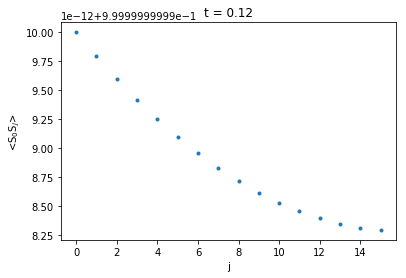

In [14]:
t      = 0.12
B      = 0
N      = 32
J      = 1
result = np.zeros(N+1)
z0     = np.array([[1,0],[0,-1]])
T      = transfermatrix (t,B,N,J)

for j in range(N):
    z_s0sj = z0
    z = np.array([[1,0],[0,1]])
    for i in range(N):
        z = z.dot(T)
        if i==j:
            z_s0sj = z_s0sj.dot(z0).dot(T)
        else :
            z_s0sj = z_s0sj.dot(T)    
    result[j] = np.trace(z_s0sj)/np.trace(z)
result[N]=result[0]
plt.plot(result[0:N//2],'.')
plt.xlabel('j')
plt.ylabel('<S$_{0}$S$_{j}$>')
plt.title('t = 0.12')